<a href="https://colab.research.google.com/github/manishaachary13/Amazon-Prime/blob/main/Amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name
$\color{blue}{\text{Amazon Prime TV Shows and Movies}}$



## **Project Summary**

Project Summary
should be like this:
Data Preprocessing :

Getting the dataset

Importing libraries

Importing datasets

Finding Missing Data

Encoding Categorical Data

Data Cleaning and Feature Engineering

Exploratory data analysis(EDA) :

1.Firstly Checked correlation between Each Features in dataset.

2.Checked if bluetooth and wifi available or not???

3.Checked can Battery Power be affected in mobile Price?? and how the battery mAh is spread

4.Checked can Ram, Screen Height ,Screen width,pixel Height ,pixel width be affected in mobile Price??

5.Checked can 4G and 3G be affected in mobile Price??

6.Checked can FC (front camera megapixels) ,PC (Primary camera Megapixels) and Mobile Weight affected in mobile Price??

# GitHub Link -


# Problem Statement

In today's competitive streaming industry, platforms like Amazon Prime Video are constantly expanding their content libraries to cater to diverse audiences. With a growing number of shows and movies available on the platform, data-driven insights play a crucial role in understanding trends, audience preferences, and content strategy.

This data set was created to list all shows available on Amazon Prime streaming, and analyze the data to find interesting facts. This dataset has data available in the United States.

This dataset has 2 csv files and it is a mix of categorical and numeric values.



**Data Overview**

This dataset contains +9k unique **titles** on Amazon Prime with 15 columns containing their information, including:


*   **id:** The title ID on JustWatch.
*   **title:** The name of the title.
*   **show_type:** TV show or movie.
*   **description:** A brief description.
*   **release_year:** The release year.
*   **age_certification:** The age certification.
*   **runtime:** The length of the episode (SHOW) or movie.
*   **genres:** A list of genres.
*   **production_countries:** A list of countries that produced the title.
*   **seasons:** Number of seasons if it's a SHOW.
*   **imdb_id:** The title ID on IMDB.
*   **imdb_score:** Score on IMDB.
*   **imdb_votes:** Votes on IMDB.
*   **tmdb_popularity:** Popularity on TMDB.
*   **tmdb_score:** Score on TMDB.

And over +124k **credits** of actors and directors on Amazon Prime titles with 5 columns containing their information:

*   **person_ID:** The person ID on JustWatch.
*   **id:** The title ID on JustWatch.
*   **name:** The actor or director's name.
*   **character_name:** The character name.
*   **role:** ACTOR or DIRECTOR.

Problem Statement(optional)

This dataset was created to analyze all shows available on Amazon Prime Video, allowing us to extract valuable insights such as:

Content Diversity: What genres and categories dominate the platform?
Regional Availability: How does content distribution vary across different regions?
Trends Over Time: How has Amazon Prime’s content library evolved?
IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
By analyzing this dataset, businesses, content creators, and data analysts can uncover key trends that influence subscription growth, user engagement, and content investment strategies in the streaming industry.

#**Project Architecture**


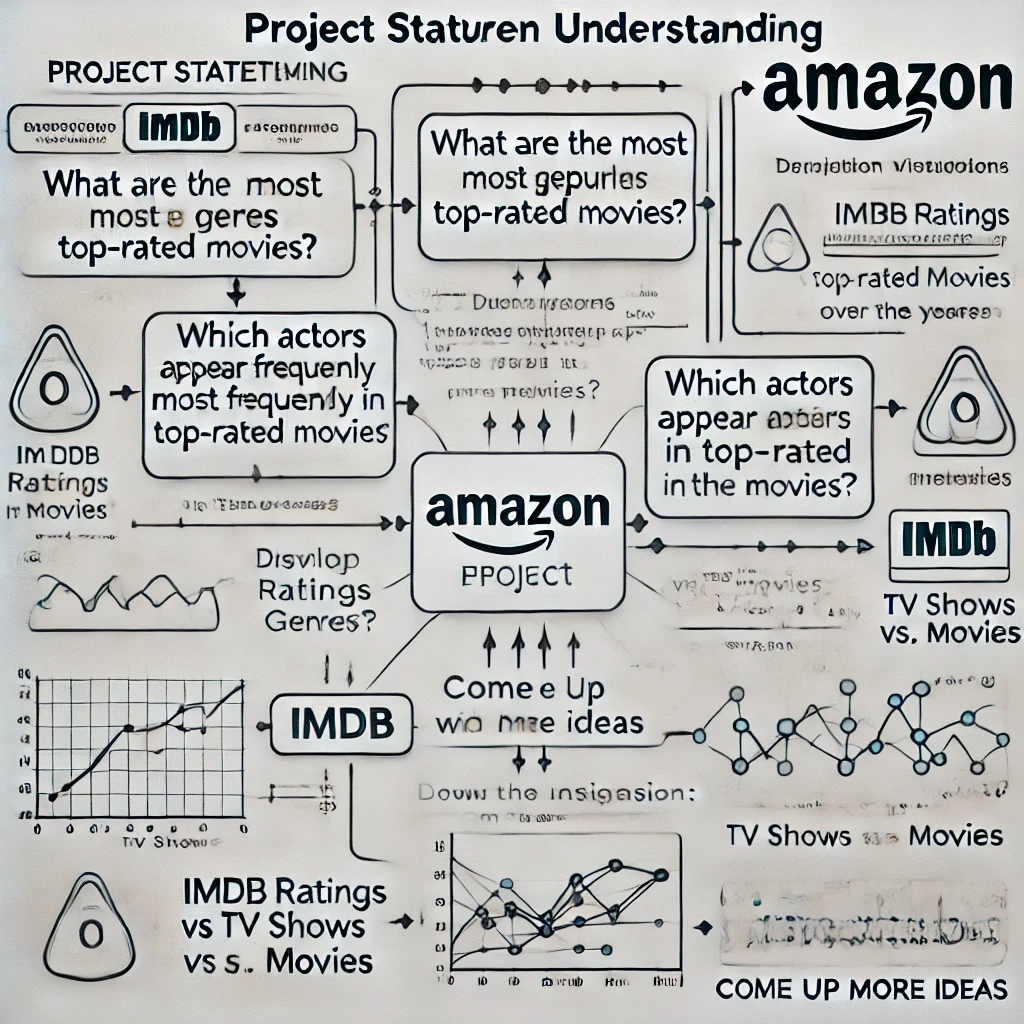

#Let's Start!

## **1. Know Your Data**

###Import Libraries

In [ ]:
# Import Libraries
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Data visualization